In [1]:
import numpy as np
from sklearn.base import BaseEstimator

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            pred[i] = 0 if X['Sex'].iloc[i] == 1 else 1
        
        return pred

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df


def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df


def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df


def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('../data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=0)

In [4]:
clf = DummyClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print(np.round(accuracy_score(y_test, pred), 4))

0.7877


In [5]:
class FakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [6]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.data)
print(digits.data.shape)
print(digits.target)
print(digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[0 1 2 ... 8 9 8]
(1797,)


In [7]:
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [8]:
print(y_test.shape)
print(pd.Series(y_test).value_counts())

(450,)
0    405
1     45
dtype: int64


In [9]:
fclf = FakeClassifier()
fclf.fit(X_train, y_train)
fpred = fclf.predict(X_test)
print(accuracy_score(y_test, fpred))

0.9


In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fpred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [11]:
from sklearn.metrics import precision_score, recall_score

print(f'precision : {precision_score(y_test, fpred)}')
print(f'recall : {recall_score(y_test, fpred)}')

precision : 0.0
recall : 0.0


C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(f'confusion matrix :\n{confusion}')
    print(f'accuracy : {accuracy:.4f}\nprecision : {precision:.4f}\nrecall : {recall:.4f}')

In [13]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('../data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=11)

In [14]:
lr_clf = LogisticRegression(max_iter=150)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

confusion matrix :
[[104  14]
 [ 13  48]]
accuracy : 0.8492
precision : 0.7742
recall : 0.7869


In [15]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print(pred_proba.shape)
print(pred_proba[:3])

(179, 2)
[[0.46229622 0.53770378]
 [0.87874129 0.12125871]
 [0.87717043 0.12282957]]


In [16]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print(pred_proba_result[:3])

[[0.46229622 0.53770378 1.        ]
 [0.87874129 0.12125871 0.        ]
 [0.87717043 0.12282957 0.        ]]


In [17]:
from sklearn.preprocessing import Binarizer

X = [
    [1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]
]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [18]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix :
[[104  14]
 [ 13  48]]
accuracy : 0.8492
precision : 0.7742
recall : 0.7869


In [19]:
custom_threshold = 0.4

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix :
[[98 20]
 [10 51]]
accuracy : 0.8324
precision : 0.7183
recall : 0.8361


In [20]:
custom_threshold = 0.6

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix :
[[112   6]
 [ 16  45]]
accuracy : 0.8771
precision : 0.8824
recall : 0.7377


In [21]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\nthreshold :', threshold)
        get_clf_eval(y_test, custom_predict)

In [22]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


threshold : 0.4
confusion matrix :
[[98 20]
 [10 51]]
accuracy : 0.8324
precision : 0.7183
recall : 0.8361

threshold : 0.45
confusion matrix :
[[103  15]
 [ 12  49]]
accuracy : 0.8492
precision : 0.7656
recall : 0.8033

threshold : 0.5
confusion matrix :
[[104  14]
 [ 13  48]]
accuracy : 0.8492
precision : 0.7742
recall : 0.7869

threshold : 0.55
confusion matrix :
[[109   9]
 [ 15  46]]
accuracy : 0.8659
precision : 0.8364
recall : 0.7541

threshold : 0.6
confusion matrix :
[[112   6]
 [ 16  45]]
accuracy : 0.8771
precision : 0.8824
recall : 0.7377


In [23]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

print(f'precisions shape : {precisions.shape}, recall shape : {recalls.shape}, thresholds shape : {thresholds.shape}\n')
print(f'precisions sample : {precisions[:3]}')
print(f'recalls sample : {recalls[:3]}')
print(f'thresholds sample : {thresholds[:3]}')

precisions shape : (144,), recall shape : (144,), thresholds shape : (143,)

precisions sample : [0.38853503 0.38461538 0.38709677]
recalls sample : [1.         0.98360656 0.98360656]
thresholds sample : [0.10386282 0.10386504 0.10389   ]


In [24]:
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

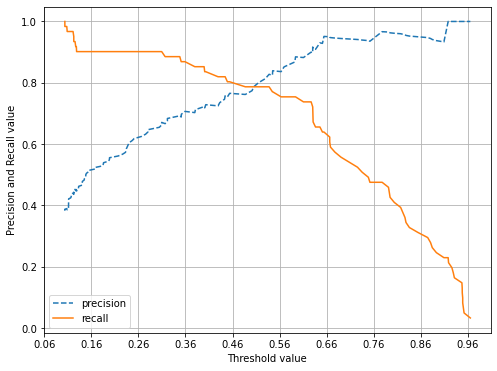

In [26]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])